In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [75]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

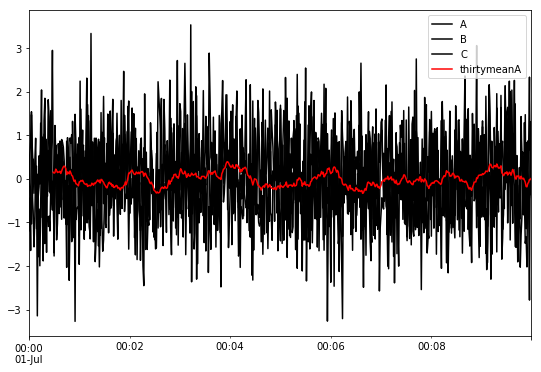

In [124]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var

df['thirtymeanA'] = df['A'].rolling(window=30).mean()
df.plot(color=('k','k','k','r'),figsize=(9,6))
#df.rolling(window=30).mean().plot(style='r')
#r.mean().plot(style = 'k',figsize=(9,6))

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,1.493354,0.059400,-0.771938
2016-07-01 00:00:02,1.196825,-1.126457,-0.463929
2016-07-01 00:00:03,0.710424,-1.658192,-0.416493
2016-07-01 00:00:04,-0.194376,-1.532311,-0.204229
2016-07-01 00:00:05,-0.223137,-1.490992,-0.060466
2016-07-01 00:00:06,-0.106914,-0.799839,-0.048034
2016-07-01 00:00:07,0.036311,-1.160770,0.218159
2016-07-01 00:00:08,-0.009361,-1.106833,0.332121
2016-07-01 00:00:09,0.131448,-0.827684,0.288197


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,-0.657757,-0.110216,-0.869117,0.909385
2016-06-07,-0.324153,-1.537426,-1.112982,0.582562
2016-06-08,0.365147,-0.751123,1.062909,0.680487
2016-06-09,0.911251,-1.195152,0.402079,0.022487
2016-06-10,-0.443162,1.059341,1.245990,-2.372625


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009351CF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000949D908>], dtype=object)

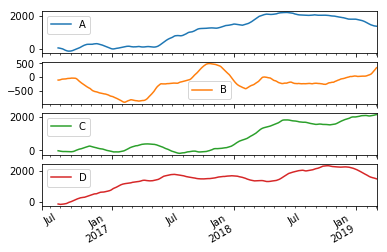

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.584474,1.035262,1.915719,1.716543


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.819833,-0.878929,-1.425608,1.200666
2016-06-08,-0.752143,-1.385541,-1.256802,1.524589
2016-06-09,-0.490485,-1.937635,-1.071880,1.692172
2016-06-10,-0.422123,-2.057023,-0.711728,1.318197


In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

#more stable. new data points have less weight when we consider all past data
#use expanding window if we need data to stabilize over time (i.e. retain importance of old data in calculating the statistic)

In [12]:
# EWMA
# Why use EWMA?

#use EWMA if it is necessary to place more weight on recent data

In [13]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=0,adjust=True,ignore_na=False).mean()


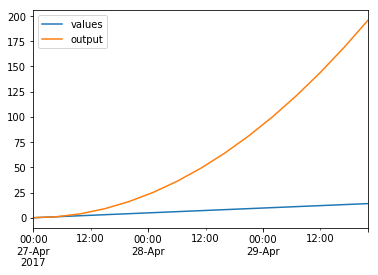

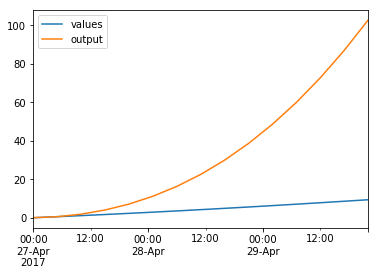

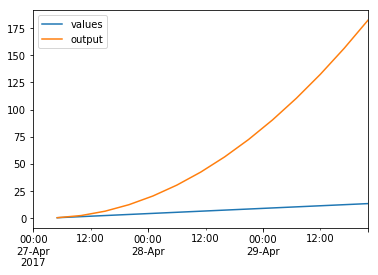

In [74]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

index = pd.date_range(start='2017-04-27',end='2017-04-30',freq='5H')
values = range(len(index))
ex_df = pd.DataFrame()

ex_df['values'] = values

f = lambda x:x**2
output = ex_df['values'].apply(f)
ex_df['output'] = output

ex_df = ex_df.set_index(index)

ex_df.plot()
pd.ewma(ex_df, span=15).plot()
ex_df.rolling(window = 2).mean().plot()

#  the shape of the curves are the same, but the values are different